<a href="https://www.kaggle.com/odins0n/feedback-prize-eda?scriptVersionId=86086357" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Created by Sanskar Hasija**

**📊 Feedback Prize - EDA 📊**

**15 DECEMBER 2021**


  # <center> 📊 FEEDBACK PRIZE - EDA 📊 </center>
## <center>If you find this notebook useful, support with an upvote👍</center>

# <center>IMPORTS</center> 

In [1]:
import os
import spacy
import wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
train_dir = "../input/feedback-prize-2021/train"
test_dir = "../input/feedback-prize-2021/test"
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

for file in range(len(train_files)):
    train_files[file] = str(train_dir) + "/" +  str(train_files[file])
for file in range(len(test_files)):
    test_files[file] = str(test_dir) + "/" +  str(test_files[file])
    
train = pd.read_csv("../input/feedback-prize-2021/train.csv")
sub = pd.read_csv("../input/feedback-prize-2021/sample_submission.csv")

# <center>EDA</center> 

In [3]:
print("Total number of train files = " , len(train_files))
print("Total number of test files = " , len(test_files))

Total number of train files =  15594
Total number of test files =  5


### Train Essay Sample

In [4]:
f = open(train_files[0], "r")
print(f.read())

I think we should be able to play in a sport if we have a grade C. I think i would be not fear for student that have a good grade like c to play in a sport. If we had a D or an F i would understand that but a C i nothing. Not a lot of kid get A or Bs and if we do. Some of those kids don't like to play a sport they like to do all there homework not that i am saying that a bad C grade people do there homework to. If there is only 1 out of 4 percent of student that get A and B, They all don't like the same sports and some don't like to do sports so it wouldn't be a hole team in that sport. that means you would have to cancel all the sport teams in the school. That why you should let C student play an a sport.


### Test Essay Sample

In [5]:
f = open(test_files[3], "r")
print(f.read())

Have you ever asked more than one person for help on what product to buy in a situation? Interviews are a perfect example of seeking more than one opinion. Interviews are seen on the news, in professional sports, and other places as well. There are a lot of people that can help you buy the right product as well. They can all open you up to new ideas. I think talking to more than one person on an opinion is a better choice because it shows you more than one option, it can change your perspective of a topic, and it informs you about what other people enjoy.

First, I think it shows you more than one option. One opinion of a person might destroy your choice on an option rather than opening it up. The whole point of asking what is the better choice, is to make it better, not worse. You could already have the better opinion, and that person might ruin it, but more people would give you a good balance of what you need to know. Multiple opinions can stride you toward different answers. Differ

## Train Tabular Dataframe

### Column Description
* **id** - ID code for essay response
* **discourse_id** - ID code for discourse element
* **discourse_start** - character position where discourse element begins in the essay response
* **discourse_end** - character position where discourse element ends in the essay response
* **discourse_text** - text of discourse element
* **discourse_type** - classification of discourse element
* **discourse_type_num** - enumerated class label of discourse element
* **predictionstring** - the word indices of the training sample, as required for predictions

### Quick view of Train Dataframe

In [6]:
train.head()

id  discourse_id  discourse_start  discourse_end  \
0  423A1CA112E2  1.622628e+12              8.0          229.0   
1  423A1CA112E2  1.622628e+12            230.0          312.0   
2  423A1CA112E2  1.622628e+12            313.0          401.0   
3  423A1CA112E2  1.622628e+12            402.0          758.0   
4  423A1CA112E2  1.622628e+12            759.0          886.0   

                                      discourse_text discourse_type  \
0  Modern humans today are always on their phone....           Lead   
1  They are some really bad consequences when stu...       Position   
2  Some certain areas in the United States ban ph...       Evidence   
3  When people have phones, they know about certa...       Evidence   
4  Driving is one of the way how to get around. P...          Claim   

  discourse_type_num                                   predictionstring  
0             Lead 1  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...  
1         Position 1       45 46 47 48 49 50 51 52 53 54 55 56 57 58 59  
2         Evidence 1    60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75  
3         Evidence 2  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...  
4            Claim 1  139 140 141 142 143 144 145 146 147 148 149 15...

### Basic statistics of training data

In [7]:
print("Number of rows in train dataframe = " , len(train))

Number of rows in train dataframe =  144293


In [8]:
train.describe()

discourse_id  discourse_start  discourse_end
count  1.442930e+05    144293.000000  144293.000000
mean   1.618936e+12       959.818855    1200.791203
std    2.491895e+09       921.054471    1010.457306
min    1.614351e+12         0.000000       3.000000
25%    1.616884e+12       277.000000     422.000000
50%    1.618862e+12       685.000000     927.000000
75%    1.621222e+12      1404.000000    1696.000000
max    1.623614e+12      7510.000000    7947.000000

### Null Values 

In [9]:
train.isnull().sum()

id                    0
discourse_id          0
discourse_start       0
discourse_end         0
discourse_text        0
discourse_type        0
discourse_type_num    0
predictionstring      0
dtype: int64

### Quick view of Submission File

In [10]:
sub.head()

id  class  predictionstring
0  18409261F5C2    NaN               NaN
1  D46BCB48440A    NaN               NaN
2  0FB0700DAF44    NaN               NaN
3  D72CB1C11673    NaN               NaN
4  DF920E0A7337    NaN               NaN

# <center>DATA DISTRIBUTION</center> 

### The 7 different Discourse Type

* **Lead** - an introduction that begins with a statistic, a quotation, a description, or some other device to grab the reader’s attention and point toward the thesis
* **Position** - an opinion or conclusion on the main question
* **Claim** - a claim that supports the position
* **Counterclaim** - a claim that refutes another claim or gives an opposing reason to the position
* **Rebuttal** - a claim that refutes a counterclaim
* **Evidence** - ideas or examples that support claims, counterclaims, or rebuttals.
* **Concluding Statement** - a concluding statement that restates the claims

### Discourse Type Distribution

In [11]:
fig = px.bar(x = np.unique(train["discourse_type"]),
y = [list(train["discourse_type"]).count(i) for i in np.unique(train["discourse_type"])] , 
            color = np.unique(train["discourse_type"]),
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="Classes")
fig.update_yaxes(title = "Number of Rows")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Discourse Type Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        template="plotly_white")
fig.show()

### Enumerated class label of Discourse Element Distribution

In [12]:
fig = px.bar(x = np.unique(train["discourse_type_num"]),
y = [list(train["discourse_type_num"]).count(i) for i in np.unique(train["discourse_type_num"])] , 
            color = np.unique(train["discourse_type_num"]),
             color_continuous_scale="blues") 
fig.update_xaxes(title="Classes")
fig.update_yaxes(title = "Number of Rows")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Enumerated class label of Discourse Element Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        template="plotly_white")
fig.show()

# <center>DISCOURSE TEXT DISTRIBUTION</center> 

### Length of Discourse Text

In [13]:
train["discourse_len"] = train["discourse_end"] - train["discourse_start"]
fig = px.histogram(data_frame= train,x = "discourse_len",  marginal="violin",nbins = 400 )
fig.update_layout(template="plotly_white")
fig.show()

### Starting Position of Discourse Text

In [14]:
fig = px.histogram(data_frame= train,x = "discourse_start",  marginal="violin" ,nbins = 400)
fig.update_layout(template="plotly_white")
fig.show()

### Ending Position of Discourse Text

In [15]:
fig = px.histogram(data_frame= train,x = "discourse_end",  marginal="violin" ,nbins = 400)
fig.update_layout(template="plotly_white")
fig.show()

# <center>WORD CLOUD</center> 

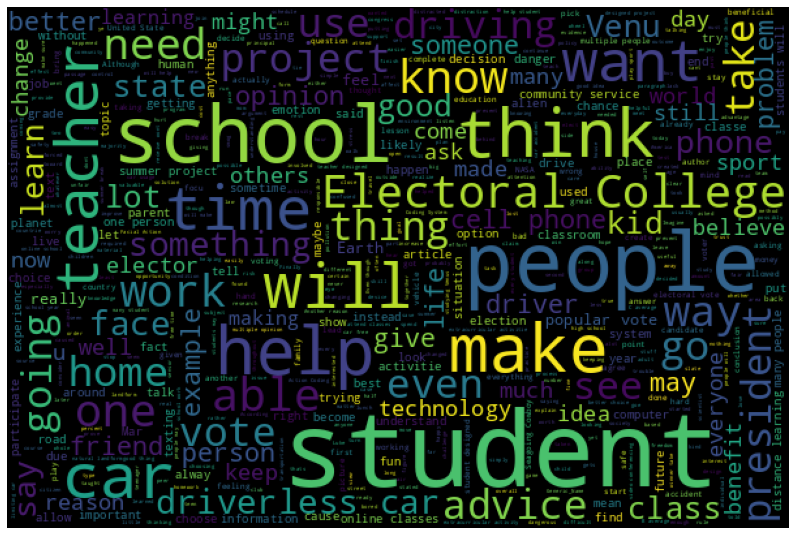

In [16]:
wordcloud = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=80, max_words=5000,
                      width = 600, height = 400,
                      background_color='black').generate(' '.join(txt for txt in train["discourse_text"]))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

# <center>TEXT VISUALIZATION</center> 

In [17]:
r = 20
ents = []
for i, row in train[train['id'] == train_files[r][35:-4]].iterrows():
    ents.append({
                    'start': int(row['discourse_start']), 
                     'end': int(row['discourse_end']), 
                     'label': row['discourse_type']
                })

with open(train_files[r], 'r') as file: data = file.read()

doc2 = {
    "text": data,
    "ents": ents,
}

colors = {'Lead': '#EE11D0','Position': '#AB4DE1','Claim': '#1EDE71','Evidence': '#33FAFA','Counterclaim': '#4253C1','Concluding Statement': 'yellow','Rebuttal': 'red'}
options = {"ents": train.discourse_type.unique().tolist(), "colors": colors}
spacy.displacy.render(doc2, style="ent", options=options, manual=True, jupyter=True);